# Linear Regression Model

## Background
In our example, we are going to try an model the relationships between two financial assets, the price of a single share of Exxon Mobile stock and the price of a barrel of oil. The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of Exxon Mobile stock.)

## Why a linear regression model?
There are so many models to choose from, why this one? Well there can be many reasons why we would choose a given model, but there were a few key reasons why a linear regression model is being selected for this example

1. We want to know whether one measurement variable is associated with another measurement variable.
2. We want to measure the strength of the association (r2).
3. We want an equation that describes the relationship and can be used to predict unknown values.

## The linear model will take the following form:

$$ y = \beta_0 + \beta_1x $$
Where each term represents:

 - $y$ is the response
 - $x$ is the feature
 - $\beta_0$ is the intercept
 - $\beta_1$ is the coefficient for x

## importing the necessary libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as nm

import math

from scipy import stats
from scipy.stats import kurtosis, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



## Loading the Data

In [25]:
# loading  the data
path = "oil_exxon.xlsx"
data = pd.read_excel(path)
data.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


## Cleaning the Data

In [26]:
# changing the index to dates and ensuring the data type to be date as well
data.index = pd.to_datetime(data["date"])
data = data.drop(['date'], axis = 1)
data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [27]:
# checking the data types
data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [28]:
# Defining the new name
new_col_names = {'exon_price': 'exxon_price'}

# renaming the the column
data = data.rename(columns= new_col_names)
data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [29]:
# checking for missing values
display(data.isna().any())

# dropping any missing values
data = data.dropna()

# checking
display(data.isna().any())

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

## Explooring the Data

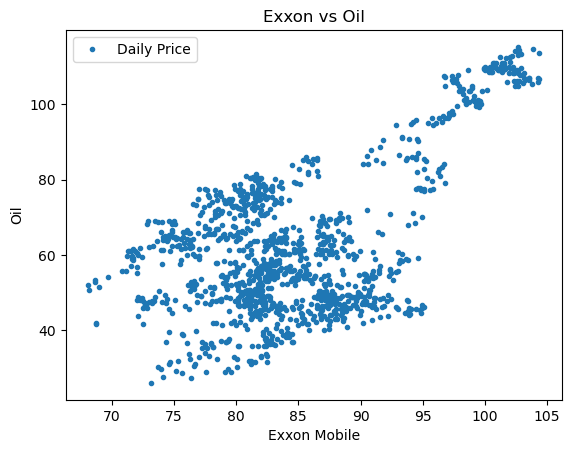

In [30]:
# Defining x and y
x = data['exxon_price']
y = data['oil_price']

# creating scatter plot
plt.plot(x, y, '.', label = 'Daily Price')

# formatting
plt.title('Exxon vs Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()
plt.show()

In [31]:
# Measuring the correlation
data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [32]:
# Summary
data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

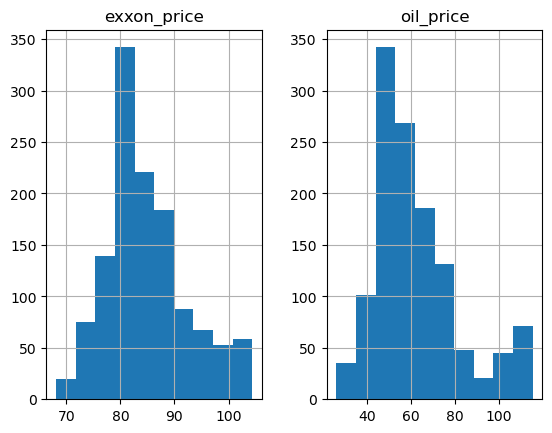

In [33]:
data.hist()

In [34]:
# Calculating the excess using fisher  method
exxon_kurtosis = kurtosis(data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(data['oil_price'], fisher = True)

# calculating the skewness
exxon_skew = skew(data['exxon_price'])
oil_skew = skew(data['oil_price'])

display("Exxon Kurtosis: {: .2}".format(exxon_kurtosis))
display("Oil Kurtosis: {: .2}".format(oil_kurtosis))

display("Exxon Skew: {: .2}".format(exxon_skew))
display("Oil Skew: {: .2}".format(oil_skew))

'Exxon Kurtosis:  0.088'

'Oil Kurtosis:  0.53'

'Exxon Skew:  0.66'

'Oil Skew:  1.0'

## Building the Model

In [35]:
# Defining our input(X) and output variable(Y)
X = data[['oil_price']]
Y = data[['exxon_price']]

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)

In [36]:
# creating a linear regression model object
regression_model = LinearRegression()

# passing through the X_train and y_train data set
regression_model.fit(x_train, y_train)

LinearRegression()

In [37]:
# Taking the coeffiecient an the intercept
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print('coefficient = {}'.format(coefficient))
print('intercept = {}'.format(intercept))

coefficient = 0.22949641565120513
intercept = 70.54598937067966


In [38]:
# Predicting
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print('predicted value = {}'.format(predicted_value))

predicted value = 85.9979830364753


c:\Users\b0648618\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
# Getting multiple predictions
y_predict = regression_model.predict(x_test)

# looking at first 5 predictions
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [40]:
# defining our input 
X2 = sm.add_constant(X)

# ceraiting a OLS model
model = sm.OLS(Y, X2)

# fitting the data
est = model.fit()

In [41]:
# making a confidence interval(95% by default)
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


### Hypothesis Testing
**Null Hypothesis**: There is no relationship between the price of oil and the price of Exxon.

The coefficient equals 0.
**Alternative Hypothesis**: There is a relationship between the price of oil and the price of Exxon.<br>The coefficient does not equal to 0.<br>

If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [42]:
# estimating the p-values
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.

## Model Fit
We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

**Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

**Mean Squared Error (MSE):** Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

**Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

Luckily for us, sklearn and statsmodel both contain functions that will calculate these metrics for us.

In [46]:
# calculating the mean squared error.
model_MSE = mean_squared_error(y_test, y_predict)

# calculating the mean absolute error.
model_MAE = mean_absolute_error(y_test, y_predict)

# calulcating the root mean squared error
model_RMSE =  math.sqrt(model_MSE)

# displaying the output
print("MSE {:.4}".format(model_MSE))
print("MAE {:.4}".format(model_MAE))
print("RMSE {:.4}".format(model_RMSE))

MSE 38.75
MAE 5.05
RMSE 6.225


### R-Squared
The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, we have to know the limitations of R-Square. One limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square. A more popular metric is the adjusted R-Square which penalizes more complex models. Let us calculate both.

In [48]:
model_R2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_R2))

R2: 0.36


With R-Square & adjusted R-Square, we have to be careful when interpreting the output because it depends on what our the goal is. The R-squared is generally of secondary importance unless the main concern is using the regression equation to make accurate predictions. It boils down to the domain-specific problem, and many people would argue an R-Square of .36 is great for stocks because it is hard to control for all the external factors, while others may not agree.

### Summary

In [49]:
# printing out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          1.42e-123
Time:                        11:17:34   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

### Plotting the Residuals 

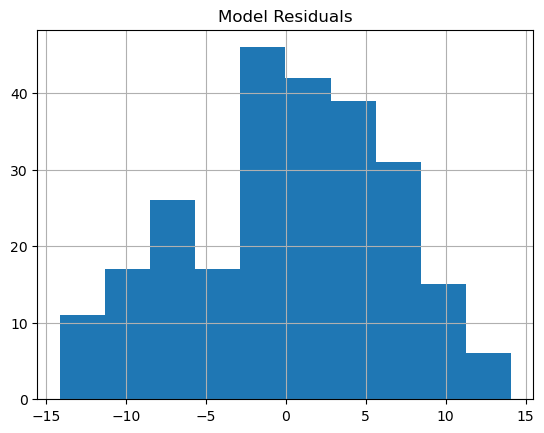

In [51]:
(y_test - y_predict).hist()
plt.title("Model Residuals")
plt.show()

In [ ]:
### Plotting our Line

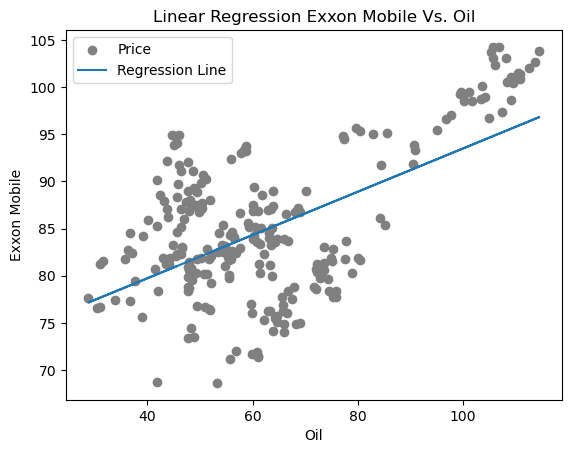

Oil coefficient:0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [56]:
# Plot outputs
plt.scatter(x_test, y_test, color = 'grey', label = 'Price')
plt.plot(x_test, y_predict, label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_MSE))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_MSE)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))


### Saving the Model for future use

In [57]:
import pickle

# pickle the model.
with open('my_linear_regression.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in.
with open('my_linear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction.
regression_model_2.predict([[67.33]])

c:\Users\b0648618\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[85.99798304]])